<ipython-input-1-66f8e20dec7a>:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


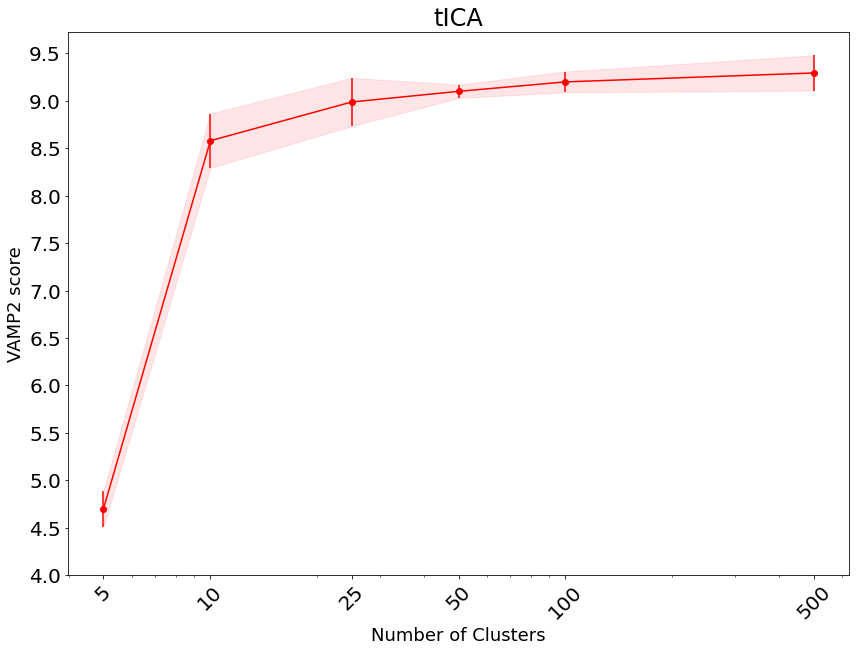

In [1]:
import os, subprocess, glob, sys
import pyemma
import numpy as np
import matplotlib.pyplot as plt

# specify data directory
current_dir = './data'

# specify featurization used to build models
feature_name = 'CA_CA_distances'

# number of microstates to visualize
nclusters = [5,10,25,50,100,500]

# load in scores generated using msm_score_generator.ipynb
# AVOID GENERATING NEW SCORES; USE THE FILE // it will take a very long time and requires HPC
scores = np.load(f'{current_dir}/{feature_name}_msm_scores.npy', allow_pickle = True)

# make figure
fig, ax = plt.subplots(figsize=(14,10))

# line plot with error bars
plt.errorbar(nclusters, scores[0], color='r', yerr = scores[1], fmt = 'o-', ecolor='r')

# fill plot with low alpha to show error bars from above
plt.fill_between(nclusters, scores[0] - scores[1], scores[0] + scores[1], 
                 color='r', facecolor='r', alpha = 0.1)

ax.set_ylabel('VAMP2 score', fontsize = 18)
ax.set_xlabel('Number of Clusters', fontsize = 18)

plt.title('tICA', fontsize=24)

# nclusters are plotting on log scale to ease understanding
plt.xscale('log')
ax.set_xticks(nclusters)
ax.set_xticklabels(nclusters, rotation = 45)

plt.xticks(nclusters,fontsize=18)
plt.yticks(np.arange(4, 10, step=0.5),fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=14)

fig.show()